In [1]:
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
file_name = "RNN_suspect%d_%d.pkl"
path = "../output_data/"

In [3]:
def stats(suspect_intervals, start_time, end_time, error_history):
    total_suspect_t=0
    tmr=0.0
    for (k, interval) in enumerate(suspect_intervals):
        total_suspect_t+=interval[1]-interval[0]
        if (k+1==len(suspect_intervals)): continue;
        tmr += suspect_intervals[k+1][0]-suspect_intervals[k][1]
    tmr/=len(suspect_intervals)-1
    #print(total_suspect_t)
    #print(end_time-start_time)
    pa = 1-total_suspect_t/(end_time-start_time)
    print("Pa is %f percent"%(pa*100,))
    print("Average Tmr is %f"%(tmr/1e9))
    #print(start_time, end_time)
    tm=0.0
    t_over=0.0
    tot_mistake=0;
    tot_correct=0;
    for (k, e) in enumerate(error_history):
        if (k==0):continue
        if (e<=0):
            tot_correct+=1;
            t_over+=-e;
        else:
            tot_mistake+=1;
            tm+=e;
    print("Average Tm is %f"%(tm/tot_mistake))
    print("Average over-estimation is %f"%(t_over/tot_correct))

../output_data/RNN_suspect1_0.pkl


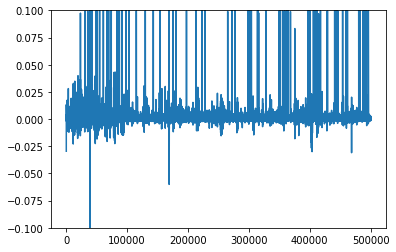

Pa is 99.766364 percent
Average Tmr is 0.369755
Average Tm is 0.001042
Average over-estimation is 0.000928
../output_data/RNN_suspect1_2.pkl


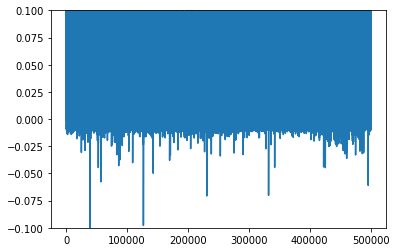

Pa is 99.522819 percent
Average Tmr is 2.299514
Average Tm is 0.018778
Average over-estimation is 0.001507
../output_data/RNN_suspect1_3.pkl


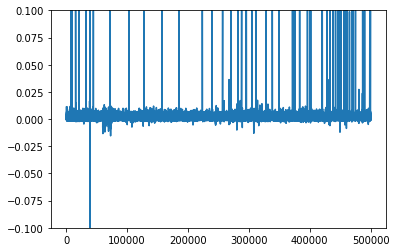

Pa is 99.913976 percent
Average Tmr is 0.747532
Average Tm is 0.000730
Average over-estimation is 0.000297
../output_data/RNN_suspect1_4.pkl


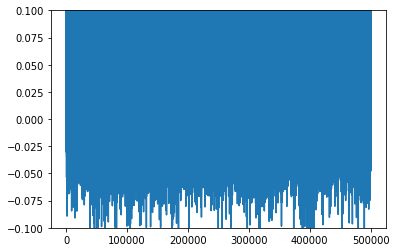

Pa is 98.365983 percent
Average Tmr is 1.185388
Average Tm is 0.023482
Average over-estimation is 0.005378


In [4]:
for i in range(1,2):
    for j in range(5):
        if (j==i): continue
        cur_file = path+file_name%(i,j)
        print(cur_file)
        f=open(cur_file, "rb")
        suspect_intervals=pkl.load(f)
        start_time=pkl.load(f)[1]
        end_time=pkl.load(f)[1]
        error_history=pkl.load(f);
        f.close()
        plt.plot(error_history[1:500000])
        plt.ylim(-0.1, 0.1);
        plt.show()
        stats(suspect_intervals,start_time,end_time,error_history)